# 6.5: Unsupervised machine learning

## This script contains the following:

### 1. Importing libraries and data

### 2. Data cleaning

### 3. Preprocessing data

### 4. Elbow technique

### 5. k-means

### 6. Creating visualisations

### 7. Descriptive statistics

### 8. Conclusion

### 1. Importing libraries and data

In [36]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [37]:
# Prompt matplotlib visuals to appear in the notebook 

%matplotlib inline

In [38]:
# Create path

path = r'C:\Users\Lenad\Documents\Data Analytics Immersion\Achievement 6\Jupyter folder\Achievement 6 project'

In [39]:
vars_list = ['Distance from UK', 'Number of visits', 'Number of nights', 'Expenditure']

In [40]:
# Import data

df = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'Travelpac_cleaned_final_UK_only.csv'), usecols = vars_list)

In [41]:
df.head()

,Distance from UK,Number of visits,Number of nights,Expenditure
0,9449,2234.480,44689.592,4.468959e+06
1,9449,1161.154,125404.640,1.161154e+06
2,9449,1184.436,23626.707,3.073333e+06
3,9449,4234.580,253600.625,2.195866e+07
4,9449,4672.794,719513.350,5.208211e+07


In [42]:
df.shape

(16729, 4)

### 2. Data cleaning

In [43]:
# Check for missing values

df.isnull().sum()

Distance from UK    0
Number of visits    0
Number of nights    0
Expenditure         0
dtype: int64

In [44]:
# Check for duplicates

dups = df.duplicated()

In [45]:
dups.shape # No duplicates

(16729,)

### 3. Preprocessing data

##### Scaling data

In [46]:
# Z-Score using pandas

df['Distance from UK'] = (df['Distance from UK'] - df['Distance from UK'].mean()) / df['Distance from UK'].std() 

In [47]:
df['Distance from UK']

0        3.825435
1        3.825435
2        3.825435
3        3.825435
4        3.825435
           ...   
16724    1.125886
16725    1.125886
16726    1.125886
16727    1.125886
16728    1.125886
Name: Distance from UK, Length: 16729, dtype: float64

In [48]:
df['Number of visits'] = (df['Number of visits'] - df['Number of visits'].mean()) / df['Number of visits'].std() 

In [49]:
df['Number of visits']

0       -0.236116
1       -0.324638
2       -0.322718
3       -0.071160
4       -0.035018
           ...   
16724   -0.059532
16725   -0.347807
16726   -0.401575
16727   -0.401575
16728   -0.401575
Name: Number of visits, Length: 16729, dtype: float64

In [50]:
df['Number of nights'] = (df['Number of nights'] - df['Number of nights'].mean()) / df['Number of nights'].std() 

In [51]:
df['Number of nights']

0       -0.074620
1        0.658436
2       -0.265913
3        1.822715
4        6.054146
           ...   
16724   -0.281797
16725   -0.440520
16726   -0.451465
16727   -0.436952
16728   -0.459759
Name: Number of nights, Length: 16729, dtype: float64

In [52]:
df['Expenditure'] = (df['Expenditure'] - df['Expenditure'].mean()) / df['Expenditure'].std() 

In [53]:
df['Expenditure']

0        0.025260
1       -0.307959
2       -0.115331
3        1.787124
4        4.821676
           ...   
16724    0.203230
16725   -0.247586
16726   -0.376176
16727   -0.197374
16728   -0.389170
Name: Expenditure, Length: 16729, dtype: float64

### 4. Elbow technique

In [54]:
# Define the range of potential clusters in the data and define clusters in this range

num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [55]:
# Creates a score

score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

score

C:\Users\Lenad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenad\anaconda3\Lib\site-packages\sklearn\clust

[-66911.99999999993,
 -41974.47129985661,
 -28106.159060470738,
 -18105.653290811526,
 -15120.629805066521,
 -13414.347203817088,
 -11763.532152155227,
 -10435.174663117841,
 -9446.666834498592]

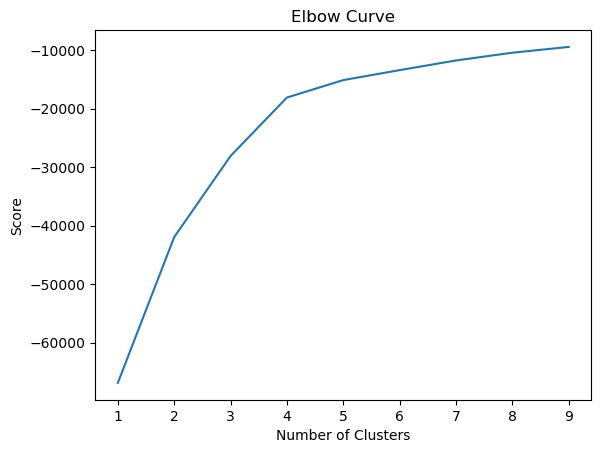

In [56]:
# Plot elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

After looking at the above elbow curve, I am going to choose 4 for the number of clusters. Although the line continues to rise after that point, it rises at a shallower rate and does so after the visible 'elbow' in the line.

### 5. k-means

In [57]:
# Create the k-means object

kmeans = KMeans(n_clusters = 4) 

In [58]:
# Fit the k-means object to the data

kmeans.fit(df)

C:\Users\Lenad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [59]:
# Add new column to dataframe to view clusters

df['clusters'] = kmeans.fit_predict(df)

C:\Users\Lenad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [60]:
df.head()

,Distance from UK,Number of visits,Number of nights,Expenditure,clusters
0,3.825435,-0.236116,-0.074620,0.025260,0
1,3.825435,-0.324638,0.658436,-0.307959,0
2,3.825435,-0.322718,-0.265913,-0.115331,0
3,3.825435,-0.071160,1.822715,1.787124,0
4,3.825435,-0.035018,6.054146,4.821676,3


In [61]:
# Check how many data points are in each cluster

df['clusters'].value_counts()

clusters
1    11395
0     4439
3      824
2       71
Name: count, dtype: int64

### 6. Creating visualisations

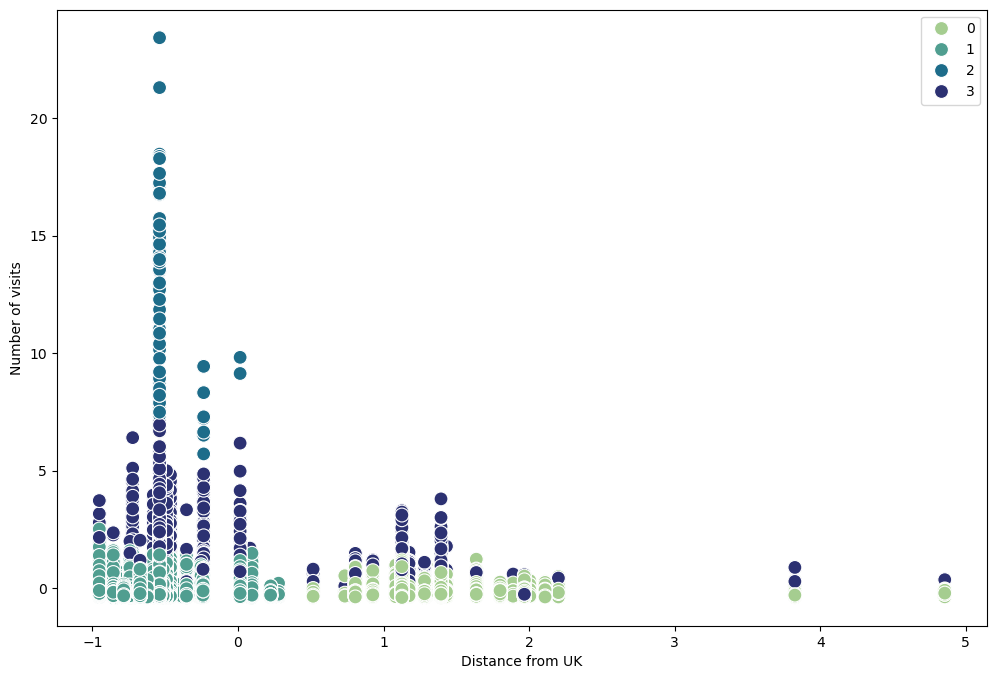

In [62]:
# Plot the clusters for the 'Distance from UK' and 'Number of visits' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Distance from UK'], y=df['Number of visits'], hue=kmeans.labels_, palette='crest', s=100) 

ax.grid(False)
plt.xlabel('Distance from UK')
plt.ylabel('Number of visits')
plt.show()

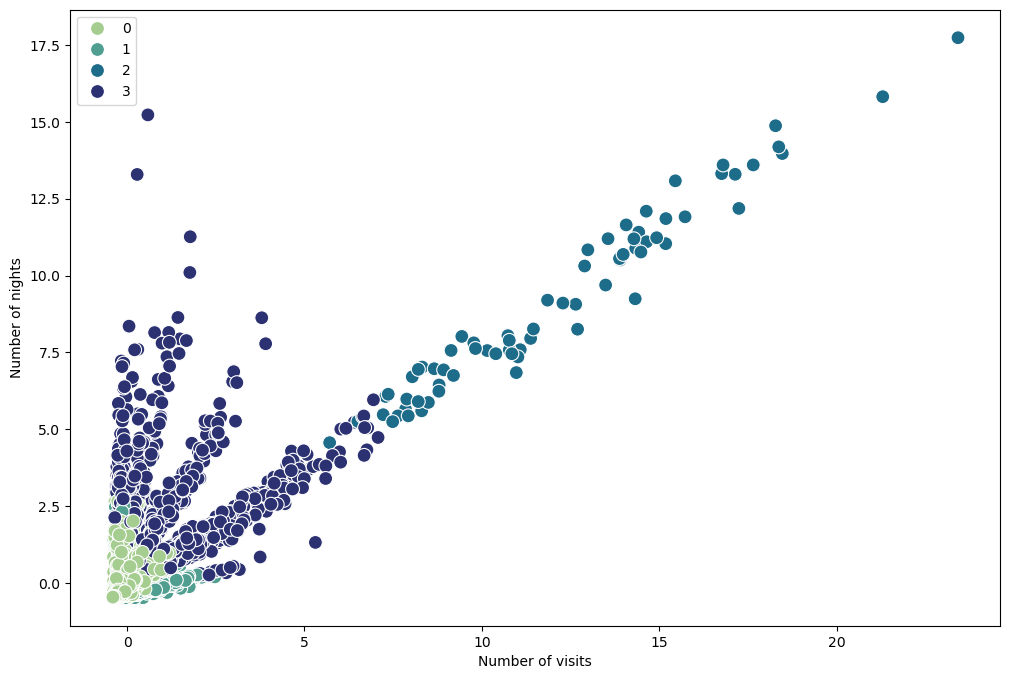

In [63]:
# Plot the clusters for the 'Number of visits' and 'Number of nights' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Number of visits'], y=df['Number of nights'], hue=kmeans.labels_, palette='crest', s=100) 

ax.grid(False)
plt.xlabel('Number of visits')
plt.ylabel('Number of nights')
plt.show()

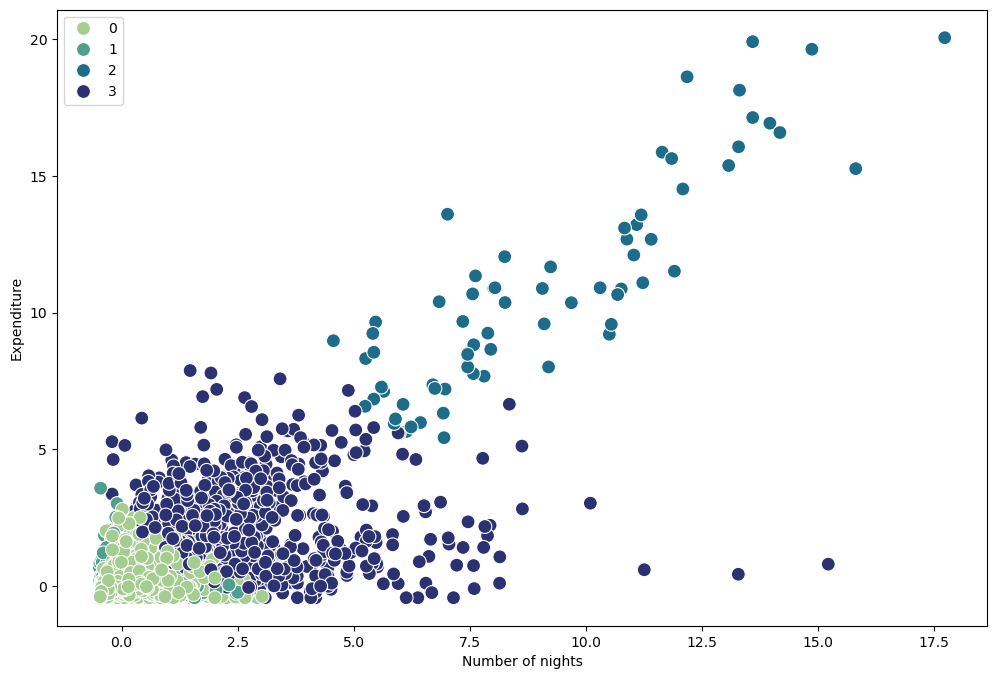

In [64]:
# Plot the clusters for the 'Number of nights' and 'Expenditure' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Number of nights'], y=df['Expenditure'], hue=kmeans.labels_, palette='crest', s=100) 

ax.grid(False)
plt.xlabel('Number of nights')
plt.ylabel('Expenditure')
plt.show()

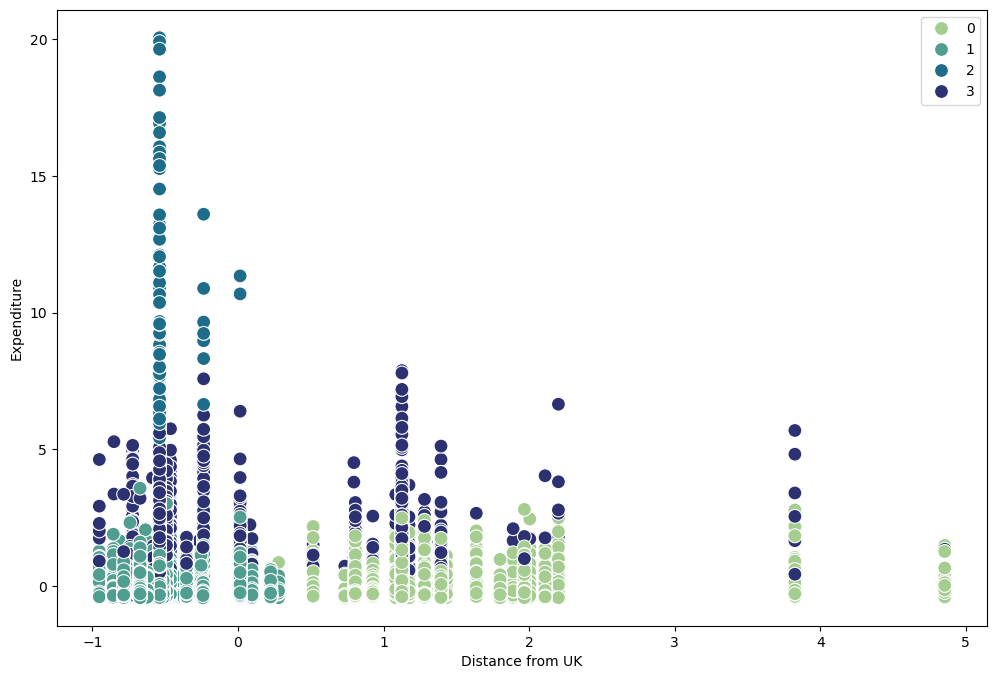

In [65]:
# Plot the clusters for the 'Distance from UK' and 'Expenditure' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Distance from UK'], y=df['Expenditure'], hue=kmeans.labels_, palette='crest', s=100) 

ax.grid(False)
plt.xlabel('Distance from UK')
plt.ylabel('Expenditure')
plt.show()

These clusters do generally make sense. The 'Dark green' cluster appears to represent those who do not travel far from or to the UK, make the fewest visits over the smallest number of nights and do not spend much while they are away. The 'Dark blue' data points show those who travel a little further for longer periods of time and spend a bit more money - perhaps they could be termed the 'average traveller'. The 'Medium green' cluster could represent a wealthier traveller - they do not necessarily travel far, but they go for longer periods of time and with more money to spend. We can see from the scatterplot showing 'Number of visits' vs 'Number of nights' that those two variables rise in line with each other. This category of traveller is not necessarily making a couple of weekend trips away, they are taking several trips - and, as we can see in the scatterplot showing 'Expenditure' against 'Number of nights', they are not being particularly frugal while they are doing it.
However, the cluster that I do not quite understand is the 'Light green' cluster. This cluster largely  shows travellers who come from/go to countries that are not near-neighbours of the UK. They appear to make fewer visits, which is understandable when distance is taken into consideration, but those visits last for fewest nights. This is the part that does not make as much sense. They also manage to spend relatively little. If it was not for the low number of nights stayed, I would almost think this group consists of budget travellers - backpackers, for example. But I can not imagine a backpacker staying for such little time!

### 7. Descriptive statistics

In [66]:
df.loc[df['clusters'] == 0, 'cluster'] = 'Light green'
df.loc[df['clusters'] == 1, 'cluster'] = 'Medium green'
df.loc[df['clusters'] == 2, 'cluster'] = 'Dark green'
df.loc[df['clusters'] == 3, 'cluster'] = 'Dark blue'

In [67]:
# Calculate descriptive statistics

df.groupby('cluster').agg({'Distance from UK':['mean', 'median'], 
                         'Number of visits':['mean', 'median'], 
                         'Number of nights':['mean', 'median'],
                          'Expenditure':['mean', 'median']})

Distance from UK           Number of visits             \
                         mean    median             mean     median   
cluster                                                               
Dark blue            0.136125 -0.236076         1.643178   1.432480   
Dark green          -0.493514 -0.538965        12.007418  11.375607   
Light green          1.421837  1.280961        -0.183900  -0.247210   
Medium green        -0.560655 -0.582013        -0.121998  -0.233227   

             Number of nights           Expenditure             
                         mean    median        mean     median  
cluster                                                         
Dark blue            2.411337  1.974020    2.021966   1.651206  
Dark green           9.105956  8.045290   10.829542  10.365185  
Light green         -0.001893 -0.181488   -0.037375  -0.188076  
Medium green        -0.230369 -0.346008   -0.199130  -0.304906

The descriptive statistics above are largely in line with my thoughts above. The 'Dark green' cluster has the lowest mean and median of all the categories, barring 'Number of visits', where it is narrowly beaten by the 'Light green' cluster. This bears out my idea that this category is home to those who do not leave or visit the UK very much and only make short trips, spending little. 
The 'Light Green' cluster has among the lowest statistics in most categories, apart from 'Distance from UK'. It contains travellers from the furthest countries, but the statistics show that the number of visits and nights, as well as expenditure, is lower than expected compared with the distance travelled from or to.
The 'Dark blue' cluster mean and median for all categories is the second highest of the four clusters. This group travels further, for more trips lasting more nights, and spend more than the previous two clusters.
The 'Medium green' cluster has a significantly higher mean and medium in all but 'Distance from UK' than the other clusters. This group may not travel the furthest, but it certainly travels more, for longer, while spending more.

### 8. Conclusion

These results are really useful in that they have created some interesting groupings that could certainly be used in future steps of an analytics pipeline. 

We can already see the beginnings of groups of infrequent, average and wealthy travellers, each of which could be targetted more directly for tourism advertising.
However, the categorical variables that could not be used in this analysis hold some important information that would help create even better groupings, allowing advertising, etc, to be focussed on a much more specific set of people. The missing variables would help decide on the sex and age group of travellers, the time of year that they are most likely to travel and specific countries they have previously visited. For example, let's take the group I thought of as 'wealthy travellers'. Knowing that they do not generally travel far from the UK is useful, but specifically where do they usually travel? How might we best persuade them to try a new destination? The more information we hold, the better our chances of chosing the right form of advertising, as well as the best medium in or on which to place the advert.

This analysis has been a great starting point and the fact that it has allowed me to think about where my analysis could go next has been hugely helpful.

In [68]:
df.columns

Index(['Distance from UK', 'Number of visits', 'Number of nights',
       'Expenditure', 'clusters', 'cluster'],
      dtype='object')

In [69]:
df.to_excel('output3.xlsx', index=False)